In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

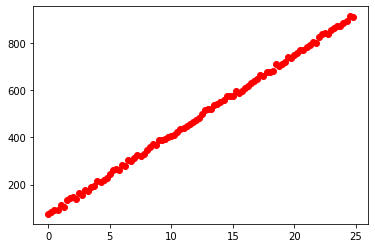

[[1.  ]
 [1.25]]


In [2]:
x=np.arange(0,25,0.25)
y=[]
for i in x:
    y.append(34*i+63+np.random.randint(0,20))
x=np.reshape(x,(100,1))
y=np.reshape(y,(100,1))
plt.plot(x,y,'ro')
plt.show()
print((np.append(1,x[5]).reshape(2,1)))

In [3]:
size=np.size(x) # size of dataset
features=np.size(x[1])
print(size,' ',features)

100   1


In [86]:
def learner(lamda, err): # lol no meaning of error here
    converged=False
    i=0
    theta=np.random.randn(features+1,1)
    h=lambda x: np.dot(theta.transpose(),x)
    while not converged:
        # we use lasso regression here
        loss=0
        suma=0
        for n in range(0,size):
            loss+=(h(np.append(1,x[n]).reshape(features+1,1))-y[n])**2/2
        for n in range(0,features+1):# this wasnt really required
            suma+=abs(theta[n])
        # loss=loss+lamda*suma
        s=lambda rho,z: (rho-abs(lamda)) if rho>abs(lamda) else 0 # outputs the s(rho,z) value
        if i<size and loss>err:
            for j in range(0,features+1):
                rho=0
                z=0
                for k in range(0,size):
                    xtemp=np.append(1,x[k])
                    # print(xtemp)
                    rho+=-xtemp[j]*(h(xtemp.reshape(features+1,1))-y[k]-theta[j]*xtemp[j])
                    # print(k,j)
                    z+=xtemp[j]**2
                theta[j]=s(rho,z)/z # revising theta value, also z!=1 here since data not normalized
            print('iteration:',i+1,' loss:',loss)
            i+=1
        else:
            converged=True
            print('converged. loss:',loss)
    return theta

In [89]:
result=learner(2*10**(2),5)# converges perfectly at lambda=2e2

iteration: 1  loss: [[15409055.09803354]]
iteration: 2  loss: [[2272877.35830203]]
iteration: 3  loss: [[1251474.71946891]]
iteration: 4  loss: [[686583.38097498]]
iteration: 5  loss: [[374918.72724312]]
iteration: 6  loss: [[203529.87155315]]
iteration: 7  loss: [[109705.71479144]]
iteration: 8  loss: [[58664.3195276]]
iteration: 9  loss: [[31141.02602319]]
iteration: 10  loss: [[16485.73758819]]
iteration: 11  loss: [[8825.76862882]]
iteration: 12  loss: [[4934.08450909]]
iteration: 13  loss: [[3045.9386794]]
iteration: 14  loss: [[2202.68836507]]
iteration: 15  loss: [[1888.46884724]]
iteration: 16  loss: [[1829.42200046]]
iteration: 17  loss: [[1883.05149335]]
iteration: 18  loss: [[1977.47240045]]
iteration: 19  loss: [[2078.2259641]]
iteration: 20  loss: [[2170.28081337]]
iteration: 21  loss: [[2248.36892042]]
iteration: 22  loss: [[2311.87180059]]
iteration: 23  loss: [[2362.17262452]]
iteration: 24  loss: [[2401.33080031]]
iteration: 25  loss: [[2431.45515406]]
iteration: 26  l

[[64.85009901]
 [34.39918392]]


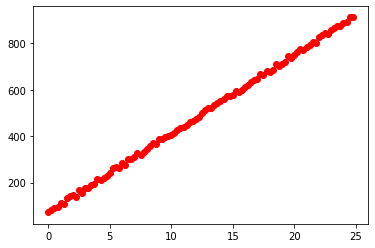

In [90]:
pred=[]
for i in range(0,size):
    pred.append(np.dot(result.transpose(),np.append(1,x[i]).reshape(features+1,1)))
print(result)
plt.plot(x,np.reshape(pred,(-1,1)))
plt.plot(x,y,'ro')
plt.show()